
# Técnicas de Validación en Machine Learning

En Machine Learning, es fundamental evaluar correctamente el desempeño de un modelo. Dos de las principales técnicas de validación son **Hold-Out** y **K-Fold Cross Validation**.

## 1. Validación Hold-Out

En este método, se divide el conjunto de datos en dos partes:

- Un **conjunto de entrenamiento** que se usa para ajustar el modelo.
- Un **conjunto de prueba** que se usa para evaluar el modelo.

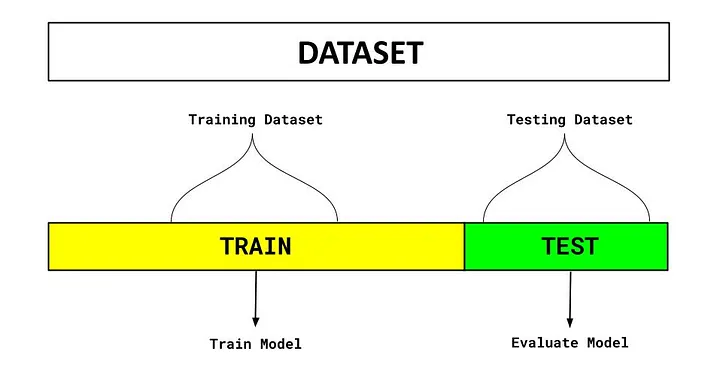

### Ejemplo de Hold-Out con Scikit-Learn

A continuación, se muestra cómo aplicar Hold-Out usando `scikit-learn`.


In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Cargar el dataset de ejemplo
iris = load_iris()
X, y = iris.data, iris.target

# División Hold-Out (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluación
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score, test_score


(0.975, 1.0)


## 2. Validación Cruzada K-Fold

El método **K-Fold Cross Validation** divide el conjunto de datos en *K* subconjuntos o "folds". El modelo se entrena *K* veces, cada vez usando *K-1* folds para entrenar y 1 fold para evaluar.

Ejemplo con *K=5*:

| Fold | Train | Test |
|------|-------|------|
| 1    | 2 3 4 5 | 1 |
| 2    | 1 3 4 5 | 2 |
| 3    | 1 2 4 5 | 3 |
| 4    | 1 2 3 5 | 4 |
| 5    | 1 2 3 4 | 5 |

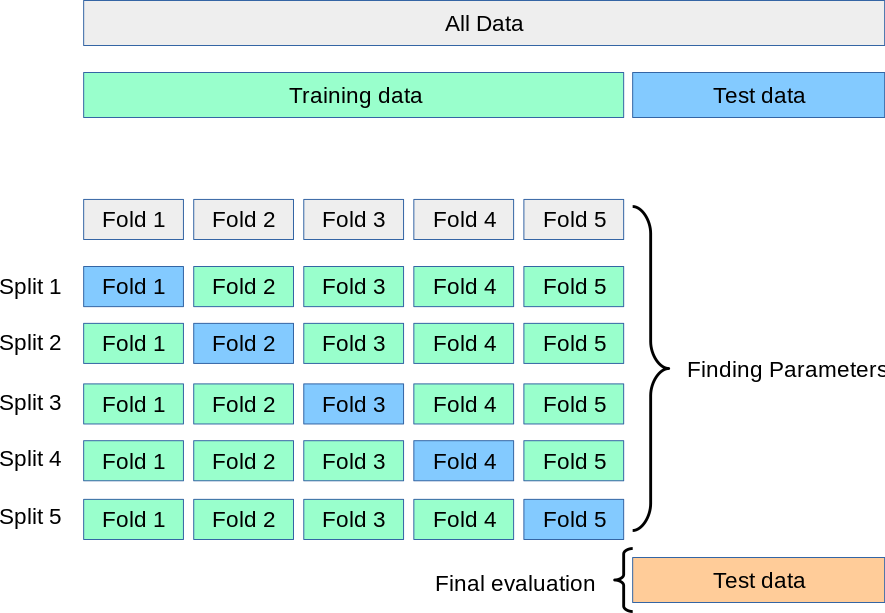
### Ejemplo de K-Fold con Scikit-Learn


In [ ]:

from sklearn.model_selection import KFold, cross_val_score

# Configuración de K-Fold con 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar modelo con validación cruzada
scores = cross_val_score(model, X, y, cv=kf)

# Resultados de cada iteración y promedio
scores, scores.mean()


(array([1.        , 1.        , 0.93333333, 0.96666667, 0.96666667]),
 np.float64(0.9733333333333334))

## Comparación y Cuándo Usar Cada Técnica

| **Criterio**       | **Hold Out**           | **K-Fold**              |
|--------------------|------------------------|-------------------------|
| **Velocidad**      | Rápido                 | Lento (entrena *k* modelos) |
| **Estabilidad**    | Varianza potencialmente alta *         | Varianza baja           |
| **Uso de Datos**   | Ineficiente            | Eficiente               |
| **Recomendación**  | Datos grandes          | Datos pequeños/medianos |

### Explicación por Criterio:
1. **Velocidad**  
   - *Hold Out*: Entrena 1 solo modelo.  
   - *K-Fold*: Entrena *k* modelos (ej: 5 iteraciones = 5 modelos).  

2. **Estabilidad**  
   - *Hold Out*: Resultado depende de cómo se dividan los datos.  
   - *K-Fold*: Promedia *k* evaluaciones, reduciendo sesgos.  

3. **Uso de Datos**  
   - *Hold Out*: Parte de los datos nunca se usan para entrenar.  
   - *K-Fold*: Todos los datos se usan para entrenar y validar.  

4. **Recomendación**  
   - *Hold Out*: Ideal si tienes >100k muestras.  
   - *K-Fold*: Preferido para datasets <10k muestras (ej: Iris, MNIST pequeño).  